In [ ]:
pip install kmodes

In [1]:
# Import libraries
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

import pickle
import numpy as np
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

In [2]:
# Load the data
data = pickle.load(open("data/merged_hotel_data_withprice.pkl","rb"))
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76536 entries, 0 to 76535
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel_name_                  76536 non-null  object 
 1   stars                        76536 non-null  int64  
 2   location                     76536 non-null  object 
 3   review_rating                76536 non-null  object 
 4   description                  76536 non-null  object 
 5   main_facilities              76536 non-null  object 
 6   total_reviews                76536 non-null  object 
 7   sub_ratings                  76536 non-null  object 
 8   sub_ratings_categories       76536 non-null  object 
 9   sub_ratings_dict             76536 non-null  object 
 10  hotel_surroundings           76536 non-null  object 
 11  hotel_surroundings_distance  76536 non-null  object 
 12  surroundings_dict            76536 non-null  object 
 13  room_type_x     

In [3]:
data.columns

Index(['hotel_name_', 'stars', 'location', 'review_rating', 'description',
       'main_facilities', 'total_reviews', 'sub_ratings',
       'sub_ratings_categories', 'sub_ratings_dict', 'hotel_surroundings',
       'hotel_surroundings_distance', 'surroundings_dict', 'room_type_x',
       'price_list', 'cheapest_price', 'facilities_groups', 'all_facilities',
       'link', 'room_price_dict', 'name', 'room_type', 'nights_stayed',
       'month_stayed', 'occupant_type', 'from_country', 'review_score',
       'date_reviewed', 'short_review', 'positive_review', 'negative_review',
       'price'],
      dtype='object')

In [4]:
data.head()

,hotel_name_,stars,location,review_rating,description,main_facilities,total_reviews,sub_ratings,sub_ratings_categories,sub_ratings_dict,...,nights_stayed,month_stayed,occupant_type,from_country,review_score,date_reviewed,short_review,positive_review,negative_review,price
0,RedDoorz near East Avenue Medical Center,2,"90 Matatag Street, Quezon City, 1100 Manila, P...",6.0,RedDoorz near East Avenue Medical Center featu...,"[Non Smoking Rooms, Free WiFi Internet Access ...",88,"[6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...",...,1 night,January 2022,Couple,Philippines,10,January 2022,Ilike The place,I like The place and also the staff they're so...,,NaN
1,RedDoorz near East Avenue Medical Center,2,"90 Matatag Street, Quezon City, 1100 Manila, P...",6.0,RedDoorz near East Avenue Medical Center featu...,"[Non Smoking Rooms, Free WiFi Internet Access ...",88,"[6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...",...,2 nights,November 2022,Family,Philippines,7.0,November 2022,average,location,room is quite old already.,1590.0
2,RedDoorz near East Avenue Medical Center,2,"90 Matatag Street, Quezon City, 1100 Manila, P...",6.0,RedDoorz near East Avenue Medical Center featu...,"[Non Smoking Rooms, Free WiFi Internet Access ...",88,"[6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...",...,1 night,June 2022,Couple,Philippines,5.0,June 2022,okay,The location,There was cockroach and the shower valve does ...,NaN
3,RedDoorz near East Avenue Medical Center,2,"90 Matatag Street, Quezon City, 1100 Manila, P...",6.0,RedDoorz near East Avenue Medical Center featu...,"[Non Smoking Rooms, Free WiFi Internet Access ...",88,"[6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...",...,6 nights,May 2022,Solo traveler,India,6.0,May 2022,Pleasant,Its Near my work area,Wifi in the room is poor :(,977.0
4,RedDoorz near East Avenue Medical Center,2,"90 Matatag Street, Quezon City, 1100 Manila, P...",6.0,RedDoorz near East Avenue Medical Center featu...,"[Non Smoking Rooms, Free WiFi Internet Access ...",88,"[6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...",...,1 night,May 2022,Family,United Arab Emirates,7.0,May 2022,Good,The location,,1590.0


# FEATURE SELECTION

In [5]:
#define numerical variables
numerical = ['review_score','price']

In [45]:
#correct data type for numerical variables
df = data.astype({"review_score":"float"})
df = df.filter(['review_score','price','room_type','nights_stayed','occupant_type','from_country'])

In [7]:
#Define categorical variables
cat_var = ['room_type','nights_stayed','month_stayed','occupant_type','from_country',
'date_reviewed']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76536 entries, 0 to 76535
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   review_score   76536 non-null  float64
 1   price          57851 non-null  float64
 2   room_type      76536 non-null  object 
 3   nights_stayed  76536 non-null  object 
 4   month_stayed   76536 non-null  object 
 5   occupant_type  76536 non-null  object 
 6   from_country   76536 non-null  object 
 7   date_reviewed  76536 non-null  object 
dtypes: float64(2), object(6)
memory usage: 5.3+ MB


In [50]:
for i in range(0,len(df)):
         nights = df['nights_stayed'][i][0]
         df['nights_stayed'][i] = nights

C:\Users\colee\AppData\Local\Temp\ipykernel_24704\2591831089.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nights_stayed'][i] = nights


In [49]:
df['nights_stayed'][0][0]

'1'

In [51]:
df.head()

,review_score,price,room_type,nights_stayed,occupant_type,from_country
0,10.0,NaN,,1,Couple,Philippines
1,7.0,1590.0,Triple Room,2,Family,Philippines
2,5.0,NaN,,1,Couple,Philippines
3,6.0,977.0,Deluxe Room,6,Solo traveler,India
4,7.0,1590.0,Triple Room,1,Family,United Arab Emirates


In [54]:
df = df.astype({"nights_stayed":"int"})

# CLUSTERING

K-Prototypes is a lesser known sibling but offers an advantage of workign with mixed data types. It measures distance between numerical features using Euclidean distance (like K-means) but also measure the distance between categorical features using the number of matching categories. It was first published by Huang (1998).

Source: https://antonsruberts.github.io/kproto-audience/?fbclid=IwAR0MmhDGZrXseBPpV1p9JECvomHZ2F9jEVpwKJgCr0ikRrxhbx2Fdu1zmaI

In [60]:
data2 = df.dropna()
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57851 entries, 1 to 76523
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   review_score   57851 non-null  float64
 1   price          57851 non-null  float64
 2   room_type      57851 non-null  object 
 3   nights_stayed  57851 non-null  int32  
 4   occupant_type  57851 non-null  object 
 5   from_country   57851 non-null  object 
dtypes: float64(2), int32(1), object(3)
memory usage: 2.9+ MB


In [56]:
# Filter data
cluster_data = data2.copy()
cluster_data

,review_score,price,room_type,nights_stayed,occupant_type,from_country
1,7.0,1590.0,Triple Room,2,Family,Philippines
3,6.0,977.0,Deluxe Room,6,Solo traveler,India
4,7.0,1590.0,Triple Room,1,Family,United Arab Emirates
5,7.0,2308.0,Family Room,5,Family,Philippines
7,7.0,2308.0,Family Room,2,Family,Philippines
...,...,...,...,...,...,...
76495,1.0,2505.0,Superior Twin Room,1,Couple,Ireland
76510,10.0,2912.0,Deluxe Twin Room,1,Family,Australia
76511,10.0,2651.0,Deluxe Double Room,1,Family,Philippines
76515,10.0,2651.0,Deluxe Double Room,4,Group,United Arab Emirates


In [22]:
#Pre-processing for numerical variables
from sklearn.preprocessing import StandardScaler

for c in numerical:
    scaler = StandardScaler()
    cluster_data[c] = scaler.fit_transform(cluster_data[[c]])

In [57]:
#K-protoype clustering
from kmodes.kprototypes import KPrototypes

costs=[]
n_clusters = []
clusters_assigned = []

for i in tqdm(range(1,11)):
    try:
        kproto = KPrototypes(n_clusters= i, init='Cao', verbose=2)
        clusters = kproto.fit_predict(cluster_data, categorical=[2,4,5])
        costs.append(kproto.cost_)
        n_clusters.append(i)
        clusters_assigned.append(clusters)
    except:
        print(f"Can't cluster with {i} clusters")
        
# fig = go.Figure(data=go.Scatter(x=n_clusters, y=costs ))
# fig.show()

  0%|                                                                                                        | 0/10 [00:00<?, ?it/s]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 376690009282.0405
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 0, ncost: 376690009282.0405
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 0, ncost: 376690009282.0405
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 0, ncost: 376690009282.0405
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 0, ncost: 376690009282.0405
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 0, ncost: 376690009282.0405
Init: initializing centroids
Init: initializing clusters
Starting iterations..

 10%|█████████▌                                                                                      | 1/10 [01:04<09:38, 64.28s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 21673, ncost: 174953466254.01657
Run: 1, iteration: 2/100, moves: 7760, ncost: 130130820249.97656
Run: 1, iteration: 3/100, moves: 1453, ncost: 127156125937.29114
Run: 1, iteration: 4/100, moves: 212, ncost: 127076409995.2389
Run: 1, iteration: 5/100, moves: 0, ncost: 127076409995.2389
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 12632, ncost: 149434304095.1888
Run: 2, iteration: 2/100, moves: 3942, ncost: 129506273369.37679
Run: 2, iteration: 3/100, moves: 1255, ncost: 127156125937.29114
Run: 2, iteration: 4/100, moves: 212, ncost: 127076409995.2389
Run: 2, iteration: 5/100, moves: 0, ncost: 127076409995.2389
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 115, ncost: 

 20%|███████████████████                                                                            | 2/10 [04:00<17:22, 130.32s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 25246, ncost: 120438428516.90067
Run: 1, iteration: 2/100, moves: 13234, ncost: 93872297582.73303
Run: 1, iteration: 3/100, moves: 7662, ncost: 80808738303.36916
Run: 1, iteration: 4/100, moves: 3787, ncost: 77971478160.01282
Run: 1, iteration: 5/100, moves: 293, ncost: 77959839353.83272
Run: 1, iteration: 6/100, moves: 0, ncost: 77959839353.83272
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 19124, ncost: 107458315754.86739
Run: 2, iteration: 2/100, moves: 7719, ncost: 90172194248.7611
Run: 2, iteration: 3/100, moves: 5095, ncost: 78708057124.78578
Run: 2, iteration: 4/100, moves: 1816, ncost: 77960502864.61093
Run: 2, iteration: 5/100, moves: 83, ncost: 77959839353.83272
Run: 2, iteration: 6/100, moves: 0, ncost: 77959839353.83272
I

 30%|████████████████████████████▌                                                                  | 3/10 [07:22<19:00, 162.96s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 10206, ncost: 48399704789.67668
Run: 1, iteration: 2/100, moves: 2758, ncost: 41518817658.689606
Run: 1, iteration: 3/100, moves: 1016, ncost: 39138862643.38352
Run: 1, iteration: 4/100, moves: 253, ncost: 39112871413.76861
Run: 1, iteration: 5/100, moves: 84, ncost: 39112473059.35572
Run: 1, iteration: 6/100, moves: 0, ncost: 39112473059.35572
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 7035, ncost: 46947055124.64329
Run: 2, iteration: 2/100, moves: 5258, ncost: 42300600309.96732
Run: 2, iteration: 3/100, moves: 3262, ncost: 39243587523.29264
Run: 2, iteration: 4/100, moves: 1318, ncost: 39116079847.2132
Run: 2, iteration: 5/100, moves: 194, ncost: 39112871413.76861
Run: 2, iteration: 6/100, moves: 84, ncost: 39112473059.35572
Run:

 40%|██████████████████████████████████████                                                         | 4/10 [12:19<21:34, 215.81s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 14139, ncost: 37960351162.196785
Run: 1, iteration: 2/100, moves: 3893, ncost: 33458690237.845352
Run: 1, iteration: 3/100, moves: 2281, ncost: 31897673464.240364
Run: 1, iteration: 4/100, moves: 888, ncost: 31452030256.86498
Run: 1, iteration: 5/100, moves: 157, ncost: 31448229176.680733
Run: 1, iteration: 6/100, moves: 56, ncost: 31448075527.493717
Run: 1, iteration: 7/100, moves: 0, ncost: 31448075527.493717
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 30761, ncost: 43979345710.70484
Run: 2, iteration: 2/100, moves: 3329, ncost: 36680432600.360664
Run: 2, iteration: 3/100, moves: 1666, ncost: 34227028818.497635
Run: 2, iteration: 4/100, moves: 226, ncost: 34202846906.167
Run: 2, iteration: 5/100, moves: 0, ncost: 34202846906.167
I

 50%|███████████████████████████████████████████████▌                                               | 5/10 [16:44<19:27, 233.50s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 16053, ncost: 41391572172.50589
Run: 1, iteration: 2/100, moves: 4646, ncost: 32221904529.20936
Run: 1, iteration: 3/100, moves: 2746, ncost: 29373115613.269695
Run: 1, iteration: 4/100, moves: 1658, ncost: 28908606409.410107
Run: 1, iteration: 5/100, moves: 2083, ncost: 27114994781.832924
Run: 1, iteration: 6/100, moves: 894, ncost: 27022172230.505737
Run: 1, iteration: 7/100, moves: 221, ncost: 27021106490.1774
Run: 1, iteration: 8/100, moves: 0, ncost: 27021106490.1774
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 10405, ncost: 33434765292.70249
Run: 2, iteration: 2/100, moves: 6767, ncost: 29878299267.72832
Run: 2, ite

 60%|█████████████████████████████████████████████████████████                                      | 6/10 [23:12<19:04, 286.09s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 8682, ncost: 35637437138.907196
Run: 1, iteration: 2/100, moves: 5701, ncost: 33785360458.2007
Run: 1, iteration: 3/100, moves: 5114, ncost: 31430401026.64936
Run: 1, iteration: 4/100, moves: 6275, ncost: 29754036131.4327
Run: 1, iteration: 5/100, moves: 2362, ncost: 29204143183.1725
Run: 1, iteration: 6/100, moves: 3122, ncost: 28677264140.12519
Run: 1, iteration: 7/100, moves: 2309, ncost: 28132550685.199013
Run: 1, iteration: 8/100, moves: 3155, ncost: 26198862845.72111
Run: 1, iteration: 9/100, moves: 3221, ncost: 25909765918.066227
Run: 1, iteration: 10/100, moves: 2763, ncost: 25843656721.310913
Run: 1, iteration: 11/100, moves: 1547, ncost: 25829319492.766018
Run: 1, iteration: 12/100, moves: 188, ncost: 25829015221.05642
Run: 1, iteration: 13/100, moves: 8, ncost: 25829014325.736988
Run: 1, i

 70%|██████████████████████████████████████████████████████████████████▌                            | 7/10 [28:58<15:17, 305.82s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 15982, ncost: 33008745754.513256
Run: 1, iteration: 2/100, moves: 7379, ncost: 27088439920.78778
Run: 1, iteration: 3/100, moves: 5249, ncost: 24145793854.691776
Run: 1, iteration: 4/100, moves: 4466, ncost: 23858292176.5643
Run: 1, iteration: 5/100, moves: 1331, ncost: 23831929805.58796
Run: 1, iteration: 6/100, moves: 1463, ncost: 23793645764.835136
Run: 1, iteration: 7/100, moves: 228, ncost: 23792714016.59769
Run: 1, iteration: 8/100, moves: 53, ncost: 23792647975.654194
Run: 1, iteration: 9/100, moves: 0, ncost: 23792647975.654194
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initia

 80%|████████████████████████████████████████████████████████████████████████████                   | 8/10 [35:06<10:51, 325.60s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 13746, ncost: 30917464091.30979
Run: 1, iteration: 2/100, moves: 5212, ncost: 26550996285.54097
Run: 1, iteration: 3/100, moves: 4743, ncost: 23656589515.20225
Run: 1, iteration: 4/100, moves: 2397, ncost: 23470927441.37801
Run: 1, iteration: 5/100, moves: 2409, ncost: 23435101405.86778
Run: 1, iteration: 6/100, moves: 2409, ncost: 23391375709.86497
Run: 1, iteration: 7/100, moves: 1352, ncost: 23373363846.72015
Run: 1, iteration: 8/100, moves: 1291, ncost: 23359680804.02529
Run: 1, iteration: 9/100, moves: 450, ncost: 23357507908.01881
Run: 1, iteration: 10/100, moves: 256, ncost: 23356686465.83548
Run: 1, iteration: 11/100, moves: 61, ncost: 23356618884.112415
Run: 1, iteration: 12/100, moves: 0, ncost: 23356618884.112415
Init: initializing c

Run: 10, iteration: 2/100, moves: 8810, ncost: 23329366965.4473
Run: 10, iteration: 3/100, moves: 2704, ncost: 23032485891.649296
Run: 10, iteration: 4/100, moves: 1170, ncost: 22916006614.267864
Run: 10, iteration: 5/100, moves: 925, ncost: 22905591492.2478
Run: 10, iteration: 6/100, moves: 306, ncost: 22904280626.525223
Run: 10, iteration: 7/100, moves: 329, ncost: 22903838271.77782
Run: 10, iteration: 8/100, moves: 16, ncost: 22903835458.78109
Run: 10, iteration: 9/100, moves: 0, ncost: 22903835458.78109
Best run was number 6


 90%|█████████████████████████████████████████████████████████████████████████████████████▌         | 9/10 [41:58<05:52, 352.35s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting ite

Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 9, iteration: 1/100, moves: 10242, ncost: 29556237520.77846
Run: 9, iteration: 2/100, moves: 10261, ncost: 26267371636.0681
Run: 9, iteration: 3/100, moves: 4946, ncost: 23205024584.86399
Run: 9, iteration: 4/100, moves: 1470, ncost: 22989525297.746628
Run: 9, iteration: 5/100, moves: 1269, ncost: 22964943691.95927
Run: 9, iteration: 6/100, moves: 1233, ncost: 22945018921.986042
Run: 9, iteration: 7/100, moves: 418, ncost: 22943278833.336056
Run: 9, iteration: 8/100, moves: 228, ncost: 22942738108.691982
Run: 9, iteration: 9/100, moves: 0, ncost: 22942738108.691982
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
I

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [49:23<00:00, 296.38s/it]


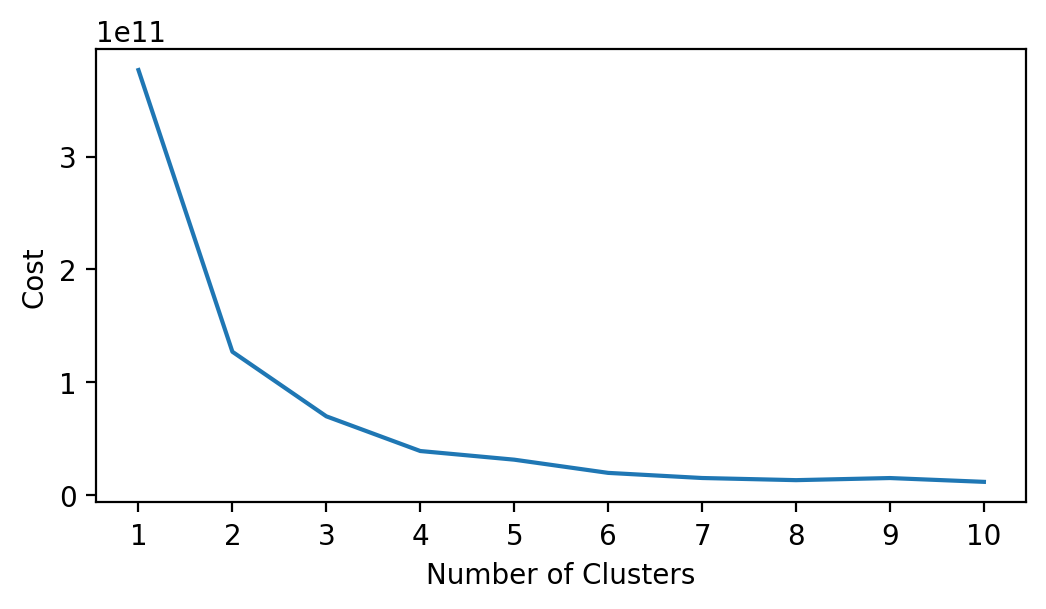

In [58]:
# Set figure size
plt.figure(figsize=(6,3)  , dpi=200)

# Plot inertia vs number of clusters
plt.plot(range(1, 11), costs)

# Format plot
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Cost")

# Show plot
plt.show()

# fig = go.Figure(data=go.Scatter(x=n_clusters, y=costs ))
# fig.show()

In [59]:
#Select best cluster based on elbow method
kproto = KPrototypes(n_clusters= 4, init='Cao', n_jobs = 4)
clusters = kproto.fit_predict(cluster_data, categorical=[2,4,5])
pd.Series(clusters).value_counts()

2    33322
0    17264
1     5467
3     1798
dtype: int64

In [61]:
# Append the labels to cluster data
cluster_data['clusters'] = clusters

In [62]:
# Inspect the characteristics 
cluster_data2 = cluster_data.groupby('clusters').agg(pd.Series.mode)
cluster_data2

,review_score,price,room_type,nights_stayed,occupant_type,from_country
clusters,,,,,,
0,10.0,3055.0,Double or Twin Room,1,Couple,Philippines
1,10.0,6000.0,Dusit King Room,1,Family,Philippines
2,10.0,1887.0,Standard Double Room,1,Solo traveler,Philippines
3,10.0,10800.0,Fairmont King Room - Non-Smoking,1,Family,Philippines


# Visualization

NameError: name 'embedding' is not defined

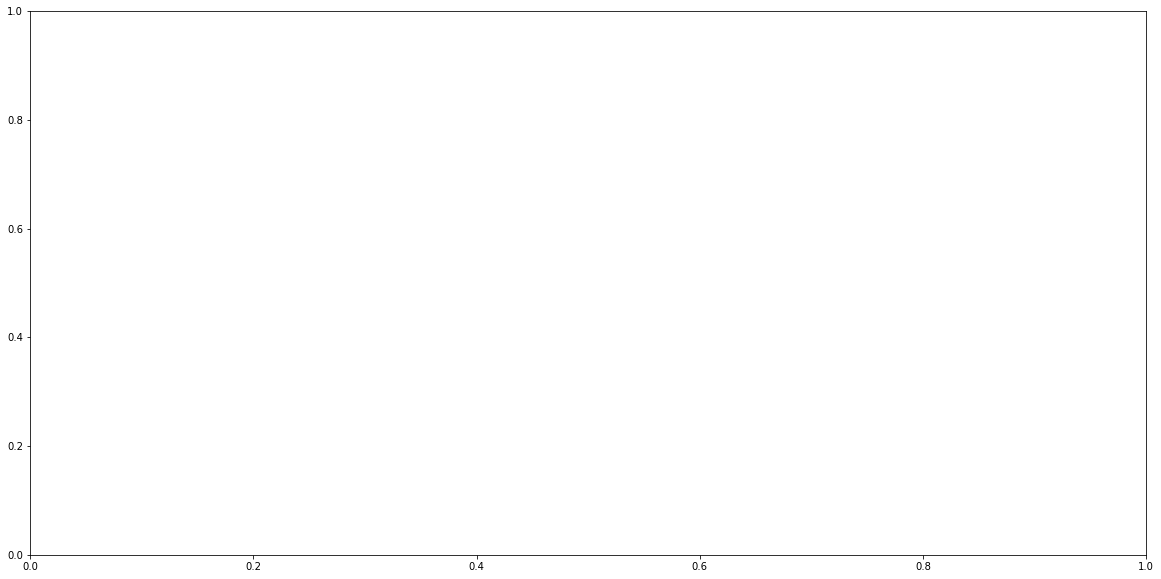

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches((20, 10))
scatter = ax.scatter(embedding[:, 0], embedding[:, 1], s=2, c=clusters, cmap='tab20b', alpha=1.0)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(num=3),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

# Evaluation

In [27]:
clf_kp = LGBMClassifier(colsample_by_tree=0.8)
cv_scores_kp = cross_val_score(clf_kp, lgbm_data, proto_clusters, scoring='f1_weighted')
print(f'CV F1 score for K-Prototypes clusters is {np.mean(cv_scores_kp)}')

NameError: name 'LGBMClassifier' is not defined

# Shap

In [ ]:
clf_kp.fit(lgbm_data, proto_clusters)
explainer_kp = shap.TreeExplainer(clf_kp)
shap_values_kp = explainer_kp.shap_values(lgbm_data)
shap.summary_plot(shap_values_kp, lgbm_data, plot_type="bar", plot_size=(15, 10))